In [12]:
%pip install icecream

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
print=ic


## MESH and CONNECTIVITY

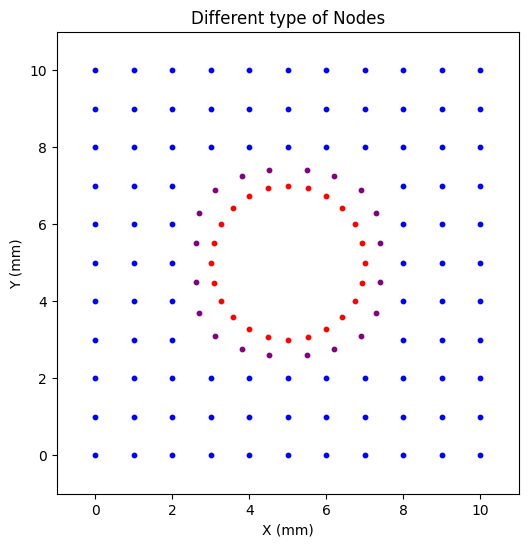

In [14]:
## Node generation

def generate_structured_points_with_hole(rect_size, hole_size, spacing):
    """
    Generate structured points inside a rectangle with a square hole at the center.

    Parameters:
    - rect_size: tuple, dimensions of the rectangle (width, height) in mm
    - hole_size: tuple, dimensions of the square hole (width, height) in mm
    - spacing: float, distance between points in mm

    Returns:
    - points: numpy array of shape (N, 2), points inside the area excluding the hole
    """
    width, height = rect_size
    hole_width, hole_height = hole_size

    # Define the hole's bounds
    hole_x_min = (width - hole_width) / 2
    hole_x_max = (width + hole_width) / 2
    hole_y_min = (height - hole_height) / 2
    hole_y_max = (height + hole_height) / 2

    # Generate structured grid points
    x_coords = np.arange(0, width + spacing, spacing)
    y_coords = np.arange(0, height + spacing, spacing)
    grid_x, grid_y = np.meshgrid(x_coords, y_coords)
    points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

    # Filter out points inside the hole
    mask = ~((hole_x_min <= points[:, 0]) & (points[:, 0] <= hole_x_max) &
             (hole_y_min <= points[:, 1]) & (points[:, 1] <= hole_y_max))

    return points[mask]

def generate_hole_perimeter_points(rect_size, hole_radius, num_nodes_on_perimeter):
    """
    Generate a grid of points with nodes on the perimeter of a hole inside the rectangle.

    Parameters:
    - rect_size: tuple, dimensions of the rectangle (width, height) in mm
    - hole_radius: float, radius of the circular hole in mm
    - num_nodes_on_perimeter: int, number of nodes on the perimeter of the hole

    Returns:
    - points: numpy array of shape (N, 2), points in the grid with nodes on the hole's perimeter
    """
    width, height = rect_size
    # Define the center of the hole
    hole_center = (width / 2, height / 2)

    # Generate a grid of points within the rectangle
    x_coords = np.arange(0, width, 1)
    y_coords = np.arange(0, height, 1)
    grid_x, grid_y = np.meshgrid(x_coords, y_coords)
    grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

    # Generate nodes on the perimeter of the hole
    angles = np.linspace(0, 2 * np.pi, num_nodes_on_perimeter, endpoint=False)
    hole_x = hole_center[0] + hole_radius * np.cos(angles)
    hole_y = hole_center[1] + hole_radius * np.sin(angles)
    hole_points = np.column_stack((hole_x, hole_y))


    return hole_points

def mirror_points(points, x_mirror, y_mirror):
    mirrored_points = []

    for point in points:
        x, y = point

        # Mirror about x = 5
        mirrored_x = 2 * x_mirror - x

        # Mirror about y = 5
        mirrored_y = 2 * y_mirror - y

        mirrored_points.append([mirrored_x, mirrored_y])
        mirrored_points.append([x, mirrored_y])
        mirrored_points.append([mirrored_x, y])

    return np.array(mirrored_points)

# Parameters
rect_size = (10, 10)
hole_size = (5.9, 5.9)
spacing = 1

structured_nodes = generate_structured_points_with_hole(rect_size, hole_size, spacing)

hole_radius = 2
num_nodes_on_perimeter = 24
hole_perimeter_nodes = generate_hole_perimeter_points(rect_size, hole_radius, num_nodes_on_perimeter)

unstructured_nodes = np.array([
    [2.6,4.5],
    [2.7,3.7],
    [3.1,3.1],
    [3.8,2.75],
    [4.5,2.6],
])


# Create mirrored points
mirrored_points = mirror_points(unstructured_nodes, x_mirror = 5, y_mirror = 5)
unstructured_nodes = np.vstack((unstructured_nodes, mirrored_points))

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(structured_nodes[:, 0], structured_nodes[:, 1], s=10, color='blue', label='Valid Points')
plt.scatter(hole_perimeter_nodes[:, 0], hole_perimeter_nodes[:, 1], s=10, color='red', label='Nodes on Hole Perimeter')

plt.scatter(unstructured_nodes[:, 0], unstructured_nodes[:, 1], s=10, color='purple', label='Unstructured Nodes')


#plt.gca().add_patch(plt.Circle((rect_size[0]/2, rect_size[1]/2), hole_radius, color='red', alpha=0.3, label='Hole'))
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Different type of Nodes')
# plt.legend()
plt.show()

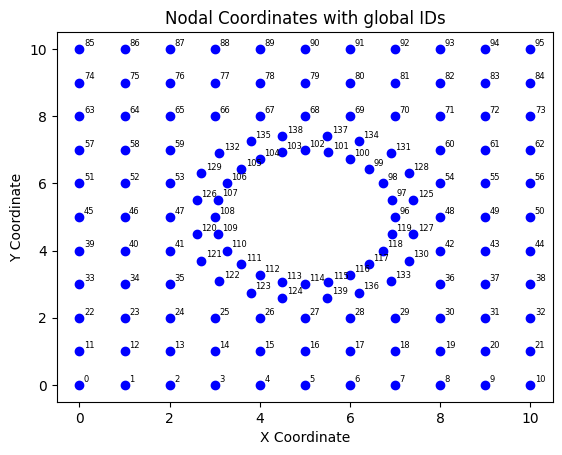

In [15]:
nodal_coordinates = np.vstack((structured_nodes, hole_perimeter_nodes, unstructured_nodes))

x_coords, y_coords = zip(*nodal_coordinates)
plt.scatter(x_coords, y_coords, color='blue')

for i, (x, y) in enumerate(nodal_coordinates):
    plt.text(x + 0.1, y + 0.1, f'{i}', fontsize=6)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Nodal Coordinates with global IDs')

plt.show()

ic| f"num of elements {connectivity.shape[0]}": 'num of elements 108'


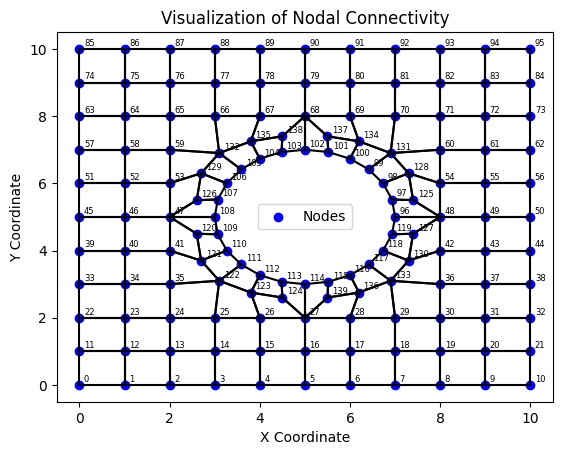

In [16]:
connectivity = [
    [0,1,12,11],
    [1,2,13,12],
    [2,3,14,13],
    [3,4,15,14],
    [4,5,16,15],
    [5,6,17,16],
    [6,7,18,17],
    [7,8,19,18],
    [8,9,20,19],
    [9,10,21,20],
    [11,12,23,22],
    [12,13,24,23],
    [13,14,25,24],
    [14,15,26,25],
    [15,16,27,26],
    [16,17,28,27],
    [17,18,29,28],
    [18,19,30,29],
    [19,20,31,30],
    [20,21,32,31],
    [22,23,34,33],
    [23,24,35,34],


    [33,34,40,39],
    [34,35,41,40],
    [39,40,46,45],
    [40,41,47,46],
    [45,46,52,51],
    [46,47,53,52],
    [51,52,58,57],
    [52,53,59,58],
    [57,58,64,63],
    [58,59,65,64],
    [30,31,37,36],
    [31,32,38,37],
    [36,37,43,42],
    [37,38,44,43],
    [42,43,49,48],
    [43,44,50,49],
    [48,49,55,54],
    [49,50,56,55],
    [54,55,61,60],
    [55,56,62,61],
    [60,61,72,71],
    [61,62,73,72],

    [63,64,75,74],
    [64,65,76,75],
    [65,66,77,76],
    [66,67,78,77],
    [67,68,79,78],
    [68,69,80,79],
    [69,70,81,80],
    [70,71,82,81],
    [71,72,83,82],
    [72,73,84,83],
    [74,75,86,85],
    [75,76,87,86],
    [76,77,88,87],
    [77,78,89,88],
    [78,79,90,89],
    [79,80,91,90],
    [80,81,92,91],
    [81,82,93,92],
    [82,83,94,93],
    [83,84,95,94],

    [24,25,122,35],
    [25,26,123,122],
    [26,27,124,123],
    [124,27,114,113],
    [35,122,121,41],
    [121,122,111,110],
    [122,123,112,111],
    [123,124,113,112],
    [41,121,120,47],
    [121,110,109,120],
    [47,120,109,108],
    [27,139,115,114],
    [27,28,136,139],
    [139,136,116,115],
    [28,29,133,136],
    [29,30,36,133],
    [133,36,42,130],
    [136,133,117,116],
    [133,130,118,117],
    [48,96,119,127],
    [118,130,127,119],
    [130,42,48,127],
    [96,48,125,97],
    [125,48,54,128],
    [131,60,71,70],
    [128,54,60,131],
    [98,128,131,99],
    [100,99,131,134],
    [97,125,128,98],
    [134,131,70,69],
    [68,102,101,137],
    [101,100,134,137],
    [137,134,69,68],
    [47,108,107,126],
    [47,126,129,53],
    [126,107,106,129],
    [59,132,66,65],
    [53,129,132,59],
    [129,106,105,132],
    [132,135,67,66],
    [105,104,135,132],
    [104,103,138,135],
    [135,138,68,67],
    [103,102,68,138]
] # N_elemsx4

connectivity = np.array(connectivity)

print(f"num of elements {connectivity.shape[0]}") # correct


# Plot the nodal coordinates
x_coords, y_coords = zip(*nodal_coordinates)
plt.scatter(x_coords, y_coords, color='blue', label='Nodes')

for i, (x, y) in enumerate(nodal_coordinates):
    plt.text(x + 0.1, y + 0.1, f'{i}', fontsize=6)

# Plot the connectivity (lines between connected nodes)
for row in connectivity:
    nodes = row  # Get the 4 connected nodes

    node0 = nodal_coordinates[nodes[0]]
    node1 = nodal_coordinates[nodes[1]]
    node2 = nodal_coordinates[nodes[2]]
    node3 = nodal_coordinates[nodes[3]]

    plt.plot([node0[0], node1[0]], [node0[1], node1[1]], color='black')
    plt.plot([node1[0], node2[0]], [node1[1], node2[1]], color='black')
    plt.plot([node2[0], node3[0]], [node2[1], node3[1]], color='black')
    plt.plot([node3[0], node0[0]], [node3[1], node0[1]], color='black')


# Set plot labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Visualization of Nodal Connectivity')

# Display the plot
plt.legend()
plt.show()


## ELEMENTS and SYSTEM

In [17]:
class NonlinearElement2D:
    def  __init__(self, node_indeces, node_coordinates):
        self.node_indeces = node_indeces
        self.node_coordinates = node_coordinates

    def get_jacobian(self, ksi1, ksi2):
        XY = self.node_coordinates

        X = XY[:,0]; Y = XY[:,1]

        J11 = dN1_ksi1(ksi1, ksi2) * X[0] + dN2_ksi1(ksi1, ksi2) * X[1] + dN3_ksi1(ksi1, ksi2) * X[2] + dN4_ksi1(ksi1, ksi2) * X[3]
        J12 = dN1_ksi2(ksi1, ksi2) * X[0] + dN2_ksi2(ksi1, ksi2) * X[1] + dN3_ksi2(ksi1, ksi2) * X[2] + dN4_ksi2(ksi1, ksi2) * X[3]
        J21 = dN1_ksi1(ksi1, ksi2) * Y[0] + dN2_ksi1(ksi1, ksi2) * Y[1] + dN3_ksi1(ksi1, ksi2) * Y[2] + dN4_ksi1(ksi1, ksi2) * Y[3]
        J22 = dN1_ksi2(ksi1, ksi2) * Y[0] + dN2_ksi2(ksi1, ksi2) * Y[1] + dN3_ksi2(ksi1, ksi2) * Y[2] + dN4_ksi2(ksi1, ksi2) * Y[3]

        self.J = np.array([[J11, J12], [J21, J22]])
        return self.J

    def get_B(self, ksi1, ksi2):
        pass


# utils

# shape functions
def N1(ksi1, ksi2): return 1/4 * (1-ksi1)*(1-ksi2)
def N2(ksi1, ksi2): return 1/4 * (1+ksi1)*(1-ksi2)
def N3(ksi1, ksi2): return 1/4 * (1+ksi1)*(1+ksi2)
def N4(ksi1, ksi2): return 1/4 * (1-ksi1)*(1+ksi2)

# derivatives of shape functions
def dN1_ksi1(ksi1, ksi2): return -1/4 * (1-ksi2)
def dN1_ksi2(ksi1, ksi2): return -1/4 * (1-ksi1)
def dN2_ksi1(ksi1, ksi2): return 1/4 * (1-ksi2)
def dN2_ksi2(ksi1, ksi2): return -1/4 * (1+ksi1)
def dN3_ksi1(ksi1, ksi2): return 1/4 * (1+ksi2)
def dN3_ksi2(ksi1, ksi2): return 1/4 * (1+ksi1)
def dN4_ksi1(ksi1, ksi2): return -1/4 * (1+ksi2)
def dN4_ksi2(ksi1, ksi2): return 1/4 * (1-ksi1)


In [18]:
elements = []
for i, node_indeces in enumerate(connectivity):
    node_coordinates = nodal_coordinates[node_indeces]
    element = NonlinearElement2D(node_indeces, node_coordinates)
    elements.append(element)

In [41]:
ee = elements[0]
ee.node_indeces, ee.node_coordinates

gauss_quadrature_points = [
    [-1/np.sqrt(3), -1/np.sqrt(3)],
    [+1/np.sqrt(3), -1/np.sqrt(3)],
    [+1/np.sqrt(3), +1/np.sqrt(3)],
    [-1/np.sqrt(3), +1/np.sqrt(3)],
    ]
gauss_quadrature_weights = [1,1,1,1]

lamb = 1
mu = 0.5

C = np.array([
    [lamb+2*mu, lamb, 0],
    [lamb, lamb+2*mu, 0],
    [0,0,mu]
])
print(C.shape)

for i, (ksi1_g, ksi2_g) in enumerate(gauss_quadrature_points):
    J = ee.get_jacobian(ksi1_g, ksi2_g)
    J_inv = np.linalg.inv(J)
    J_inv[J_inv == 0] = 1e-12
    j = np.linalg.det(J)
    wk = gauss_quadrature_weights[i]

    # print(J, J_inv)

    # B_{parameter_index}_{shape_function}
    B11 = dN1_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN1_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]
    B12 = dN2_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN2_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]
    B13 = dN3_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN3_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]
    B14 = dN4_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN4_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]


    B21 = dN1_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN1_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]
    B22 = dN2_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN2_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]
    B23 = dN3_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN3_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]
    B24 = dN4_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN4_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]

    B = np.array([
        [B11, 0, B12, 0, B13, 0, B14, 0],
        [0, B21, 0, B22, 0, B23, 0, B24],
        [B21, B11, B22, B12, B23, B13, B24, B14]
    ])

    print(B)
    print(J.shape, B.shape)




ic| C.shape: (3, 3)
ic| B: array([[-0.78867513,  0.        ,  0.78867513,  0.        ,  0.21132487,
                0.        , -0.21132487,  0.        ],
              [ 0.        , -0.78867513,  0.        , -0.21132487,  0.        ,
                0.21132487,  0.        ,  0.78867513],
              [-0.78867513, -0.78867513, -0.21132487,  0.78867513,  0.21132487,
                0.21132487,  0.78867513, -0.21132487]])
ic| J.shape: (2, 2), B.shape: (3, 8)
ic| B: array([[-0.78867513,  0.        ,  0.78867513,  0.        ,  0.21132487,
                0.        , -0.21132487,  0.        ],
              [ 0.        , -0.21132487,  0.        , -0.78867513,  0.        ,
                0.78867513,  0.        ,  0.21132487],
              [-0.21132487, -0.78867513, -0.78867513,  0.78867513,  0.78867513,
                0.21132487,  0.21132487, -0.21132487]])
ic| J.shape: (2, 2), B.shape: (3, 8)
ic| B: array([[-0.21132487,  0.        ,  0.21132487,  0.        ,  0.78867513,
              

In [20]:
1/np.sqrt(3)

0.5773502691896258